In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("golf.csv")
df

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,78,False,yes
3,rain,70,96,False,yes
4,rain,68,80,False,yes
5,rain,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rain,75,80,False,yes


In [50]:
# Converting Catergorical data into Numerical data

In [51]:
df['play_n'] = pd.factorize(df.Play)[0]
df['wind_n'] = pd.factorize(df.Wind)[0]
df['outlook_n'] = pd.factorize(df.Outlook)[0]
df.head()

,Outlook,Temperature,Humidity,Wind,Play,play_n,wind_n,outlook_n
0,sunny,85,85,False,no,0,0,0
1,sunny,80,90,True,no,0,1,0
2,overcast,83,78,False,yes,1,0,1
3,rain,70,96,False,yes,1,0,2
4,rain,68,80,False,yes,1,0,2


In [52]:
df2 = df.drop(["Outlook","Wind","Play"],axis=1)
df2.head()

,Temperature,Humidity,play_n,wind_n,outlook_n
0,85,85,0,0,0
1,80,90,0,1,0
2,83,78,1,0,1
3,70,96,1,0,2
4,68,80,1,0,2


In [53]:
# Visualisation

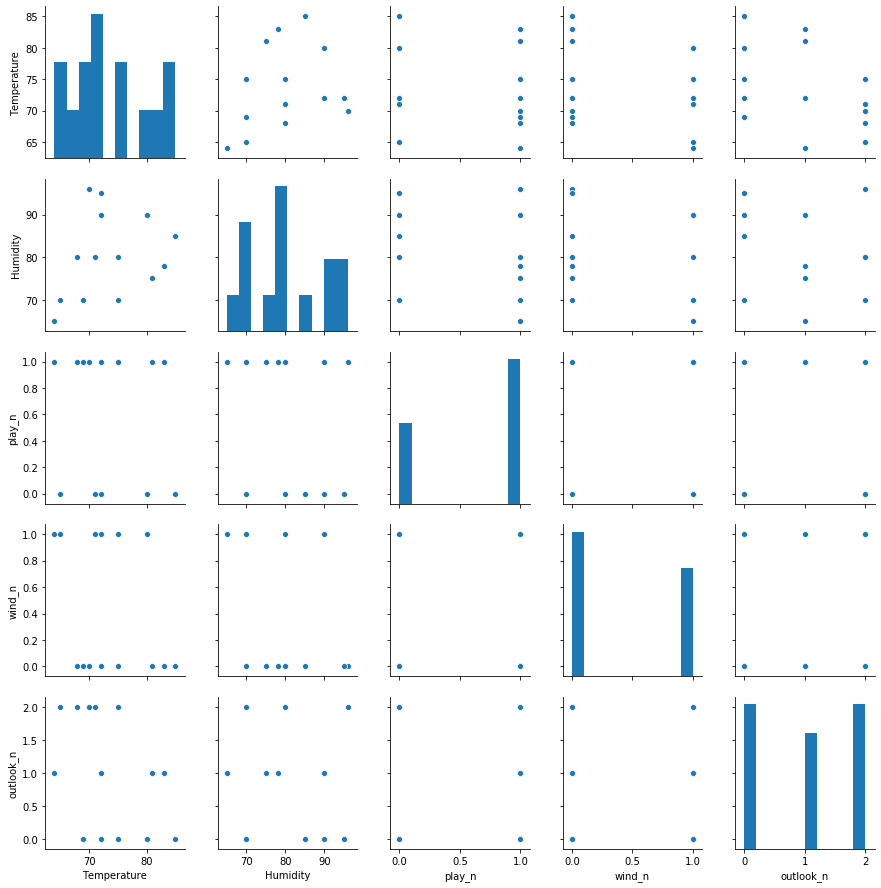

In [54]:
sns.pairplot(df2)

In [55]:
df2.corr()

,Temperature,Humidity,play_n,wind_n,outlook_n
Temperature,1.000000,0.273245,-0.121064,-0.328866,-0.427074
Humidity,0.273245,1.000000,-0.291954,-0.254415,-0.035651
play_n,-0.121064,-0.291954,1.000000,-0.258199,0.176383
wind_n,-0.328866,-0.254415,-0.258199,1.000000,0.000000
outlook_n,-0.427074,-0.035651,0.176383,0.000000,1.000000


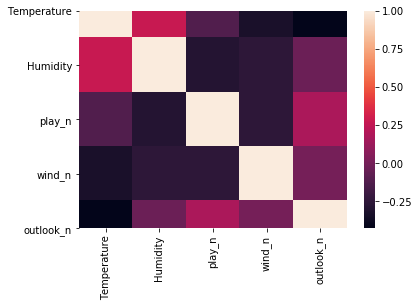

In [56]:
sns.heatmap(df2.corr())

In [57]:
# Spliting the Data

In [58]:
df2.columns.values

array(['Temperature', 'Humidity', 'play_n', 'wind_n', 'outlook_n'],
      dtype=object)

In [59]:
x = df2.drop("play_n", axis=1)
y = df2["play_n"]

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=22)

In [61]:
# Implementing Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [64]:
pred = tree.predict(x_test)

In [65]:
tree.score(x_train, y_train)

1.0

In [66]:
# Visualizing the Decision Tree

In [67]:
import pydot
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

In [68]:
df2.columns.values

array(['Temperature', 'Humidity', 'play_n', 'wind_n', 'outlook_n'],
      dtype=object)

In [69]:
# Changing the Columns

In [70]:
col = ["play_n", "wind_n", "outlook_n","Temperature","Humidity"]
df_re = df2.reindex(columns=col)

In [71]:
df_re.head()

,play_n,wind_n,outlook_n,Temperature,Humidity
0,0,0,0,85,85
1,0,1,0,80,90
2,1,0,1,83,78
3,1,0,2,70,96
4,1,0,2,68,80


In [72]:
features = list(df_re.columns[1:])
features

['wind_n', 'outlook_n', 'Temperature', 'Humidity']

In [75]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())

In [76]:
from IPython.display import Image

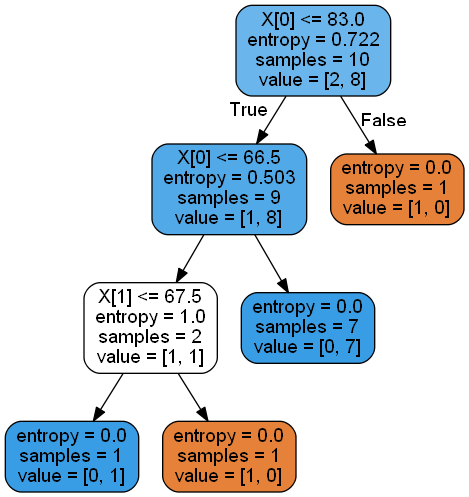

In [78]:
Image(graph[0].create_png())